/Users/doughnut/miniconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


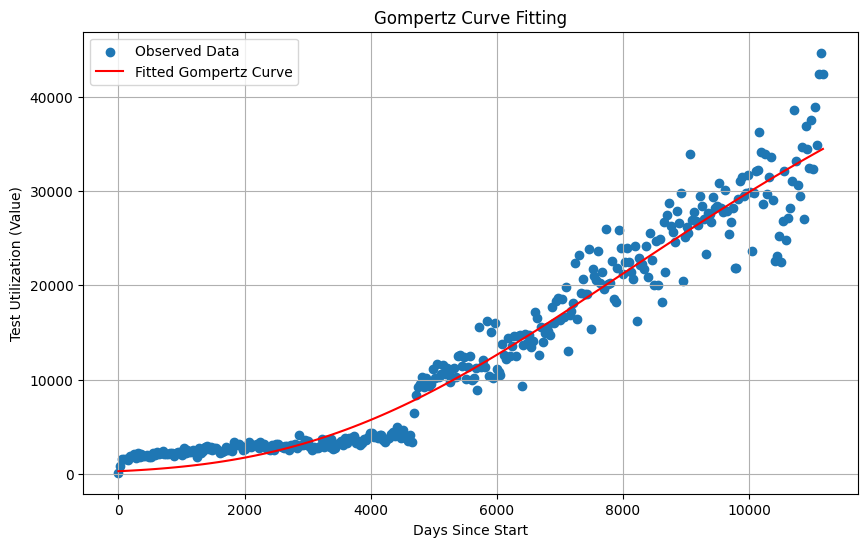

Fitted parameters: L=57414.46, k=0.0002, t0=7976.27
The test follows a Gompertz growth pattern.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the data (using your file path)
# file_path = "/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/Data Files/Processed_MBSGeneticsCount_20240325_175333.feather"
file_path = "/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/Data Files/Processed_MBSGeneticsCount_20240325_175333.feather"
data = pd.read_feather(file_path)

# Ensure the data is sorted by month
data = data.sort_values(by='Month')

# Aggregating by month
monthly_data = data.groupby('Month')['Value'].sum().reset_index()

# Gompertz Model
def gompertz_function(t, L, k, t0):
    """
    Gompertz function.
    L : the curve's maximum value (asymptote)
    k : the growth rate
    t0: the x-value of the inflection point (time offset)
    """
    return L * np.exp(-np.exp(-k * (t - t0)))

# Prepare the data for curve fitting
x_data = (monthly_data['Month'] - monthly_data['Month'].min()).dt.days  # Days since the first month
y_data = monthly_data['Value'].values

# Initial guess for parameters [L, k, t0]
initial_guess = [max(y_data), 0.1, np.median(x_data)]

# Fit the Gompertz model to the data
params, covariance = curve_fit(gompertz_function, x_data, y_data, p0=initial_guess, maxfev=2000)

# Extract the fitted parameters
L, k, t0 = params

# Generate fitted values for the curve
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = gompertz_function(x_fit, L, k, t0)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Observed Data')
plt.plot(x_fit, y_fit, color='red', label='Fitted Gompertz Curve')
plt.title('Gompertz Curve Fitting')
plt.xlabel('Days Since Start')
plt.ylabel('Test Utilization (Value)')
plt.legend()
plt.grid(True)
plt.show()

# Print the fitted parameters
print(f"Fitted parameters: L={L:.2f}, k={k:.4f}, t0={t0:.2f}")

# Check for growth pattern
if k > 0:
    print("The test follows a Gompertz growth pattern.")
else:
    print("The test does not follow a Gompertz growth pattern.")


/Users/doughnut/miniconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/m9/_g3wndrn04d80ys2382r700r0000gn/T/ipykernel_4025/2387373732.py:49: OptimizeWarning: Covariance of the parameters could not be estimated
  params_bass, _ = curve_fit(bass_diffusion, x_data, y_data, p0=initial_guess_bass, maxfev=2000)


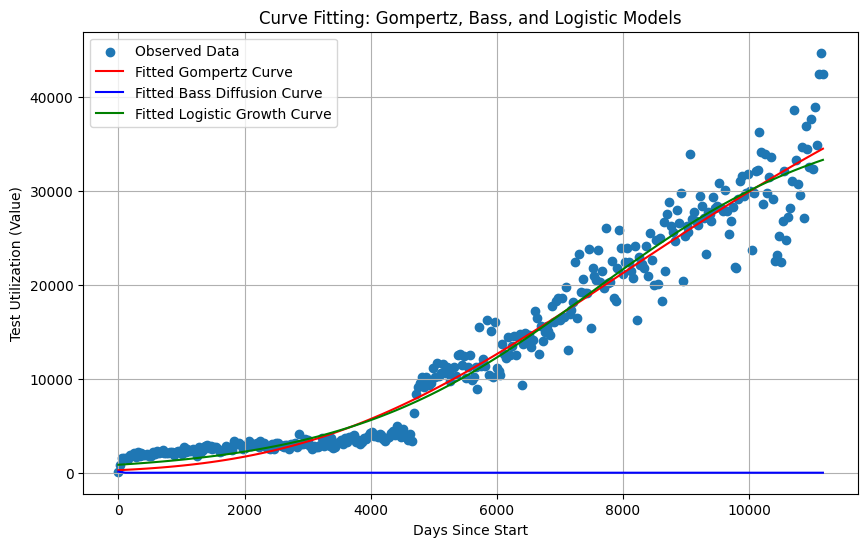

Fitted Gompertz parameters: L=57414.46, k=0.0002, t0=7976.27
Fitted Bass Diffusion parameters: p=7.3084, q=-3.0618, m=112.00
Fitted Logistic Growth parameters: L=38495.45, k=0.0005, t0=7508.31
The test follows a Gompertz growth pattern.
The test does not follow a Bass diffusion pattern.
The test follows a Logistic growth pattern.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the data (using your file path)
#file_path = "/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/Data Files/Processed_MBSGeneticsCount_20240325_175333.feather"
file_path = "/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/Data Files/Processed_MBSGeneticsCount_20240325_175333.feather"
data = pd.read_feather(file_path)

# Ensure the data is sorted by month
data = data.sort_values(by='Month')

# Aggregating by month
monthly_data = data.groupby('Month')['Value'].sum().reset_index()

# Gompertz Model
def gompertz_function(t, L, k, t0):
    return L * np.exp(-np.exp(-k * (t - t0)))

# Bass Diffusion Model
def bass_diffusion(t, p, q, m):
    """
    Bass Diffusion Model.
    p : coefficient of innovation
    q : coefficient of imitation
    m : market potential
    """
    adoption = (p + q)**2 * np.exp(-(p + q) * t) / (q * np.exp(-p * t) + p)**2
    return m * adoption

# Logistic Growth Model
def logistic_growth(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))

# Prepare the data for curve fitting
x_data = (monthly_data['Month'] - monthly_data['Month'].min()).dt.days  # Days since the first month
y_data = monthly_data['Value'].values

# Initial guess for parameters
initial_guess_gompertz = [max(y_data), 0.1, np.median(x_data)]
initial_guess_bass = [0.03, 0.38, max(y_data)]  # p, q, m
initial_guess_logistic = [max(y_data), 0.1, np.median(x_data)]

# Fit the Gompertz model to the data
params_gompertz, _ = curve_fit(gompertz_function, x_data, y_data, p0=initial_guess_gompertz, maxfev=2000)

# Fit the Bass diffusion model to the data
params_bass, _ = curve_fit(bass_diffusion, x_data, y_data, p0=initial_guess_bass, maxfev=2000)

# Fit the Logistic growth model to the data
params_logistic, _ = curve_fit(logistic_growth, x_data, y_data, p0=initial_guess_logistic, maxfev=2000)

# Extract the fitted parameters
L_g, k_g, t0_g = params_gompertz
p_b, q_b, m_b = params_bass
L_l, k_l, t0_l = params_logistic

# Generate fitted values for the curves
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit_gompertz = gompertz_function(x_fit, L_g, k_g, t0_g)
y_fit_bass = bass_diffusion(x_fit, p_b, q_b, m_b)
y_fit_logistic = logistic_growth(x_fit, L_l, k_l, t0_l)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Observed Data')
plt.plot(x_fit, y_fit_gompertz, color='red', label='Fitted Gompertz Curve')
plt.plot(x_fit, y_fit_bass, color='blue', label='Fitted Bass Diffusion Curve')
plt.plot(x_fit, y_fit_logistic, color='green', label='Fitted Logistic Growth Curve')
plt.title('Curve Fitting: Gompertz, Bass, and Logistic Models')
plt.xlabel('Days Since Start')
plt.ylabel('Test Utilization (Value)')
plt.legend()
plt.grid(True)
plt.show()

# Print the fitted parameters for all models
print(f"Fitted Gompertz parameters: L={L_g:.2f}, k={k_g:.4f}, t0={t0_g:.2f}")
print(f"Fitted Bass Diffusion parameters: p={p_b:.4f}, q={q_b:.4f}, m={m_b:.2f}")
print(f"Fitted Logistic Growth parameters: L={L_l:.2f}, k={k_l:.4f}, t0={t0_l:.2f}")

# Check for growth patterns
if k_g > 0:
    print("The test follows a Gompertz growth pattern.")
else:
    print("The test does not follow a Gompertz growth pattern.")

if p_b > 0 and q_b > 0:
    print("The test follows a Bass diffusion pattern.")
else:
    print("The test does not follow a Bass diffusion pattern.")

if k_l > 0:
    print("The test follows a Logistic growth pattern.")
else:
    print("The test does not follow a Logistic growth pattern.")


/Users/doughnut/miniconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/m9/_g3wndrn04d80ys2382r700r0000gn/T/ipykernel_4025/1001355371.py:73: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(bass_diffusion, x_data, y_data, p0=[p, q, m], maxfev=2000)


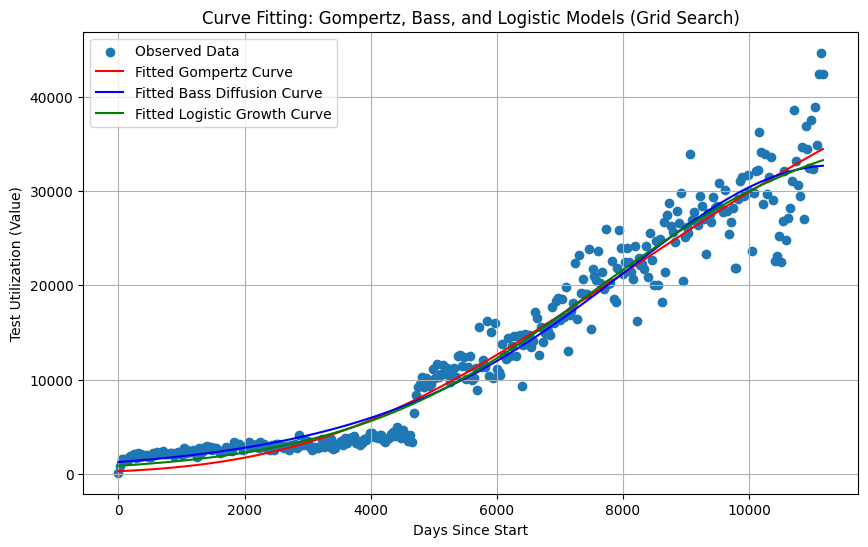

Best Gompertz parameters: L=57413.50, k=0.0002, t0=7976.18
Best Bass Diffusion parameters: p=-0.0004, q=-0.0000, m=1245.15
Best Logistic Growth parameters: L=38495.55, k=0.0005, t0=7508.32
The test follows a Gompertz growth pattern.
The test does not follow a Bass diffusion pattern.
The test follows a Logistic growth pattern.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from itertools import product

# Load the data (using your file path)
#file_path = "/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/Data Files/Processed_MBSGeneticsCount_20240325_175333.feather"
file_path = "/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/Data Files/Processed_MBSGeneticsCount_20240325_175333.feather"
data = pd.read_feather(file_path)

# Ensure the data is sorted by month
data = data.sort_values(by='Month')

# Aggregating by month
monthly_data = data.groupby('Month')['Value'].sum().reset_index()

# Gompertz Model
def gompertz_function(t, L, k, t0):
    return L * np.exp(-np.exp(-k * (t - t0)))

# Bass Diffusion Model
def bass_diffusion(t, p, q, m):
    adoption = (p + q)**2 * np.exp(-(p + q) * t) / (q * np.exp(-p * t) + p)**2
    return m * adoption

# Logistic Growth Model
def logistic_growth(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))

# Prepare the data for curve fitting
x_data = (monthly_data['Month'] - monthly_data['Month'].min()).dt.days  # Days since the first month
y_data = monthly_data['Value'].values

# Define ranges for grid search (you can adjust these ranges based on your data)
L_values = np.linspace(max(y_data) * 0.8, max(y_data) * 1.2, 5)  # Maximum value for Gompertz and Logistic
k_values = np.linspace(0.0001, 0.01, 5)  # Growth rate
t0_values = np.linspace(np.median(x_data) * 0.8, np.median(x_data) * 1.2, 5)  # Inflection point

p_values = np.linspace(0.01, 0.1, 5)  # Coefficient of innovation for Bass
q_values = np.linspace(0.01, 1, 5)  # Coefficient of imitation for Bass
m_values = np.linspace(max(y_data) * 0.8, max(y_data) * 1.2, 5)  # Market potential for Bass

# Function to calculate sum of squared residuals
def calculate_residuals(model_func, params, x_data, y_data):
    y_pred = model_func(x_data, *params)
    residuals = np.sum((y_pred - y_data) ** 2)
    return residuals

# Perform grid search for Gompertz, Bass, and Logistic models
best_params_gompertz = None
best_params_bass = None
best_params_logistic = None

best_residuals_gompertz = np.inf
best_residuals_bass = np.inf
best_residuals_logistic = np.inf

# Grid search for Gompertz
for L, k, t0 in product(L_values, k_values, t0_values):
    try:
        params, _ = curve_fit(gompertz_function, x_data, y_data, p0=[L, k, t0], maxfev=2000)
        residuals = calculate_residuals(gompertz_function, params, x_data, y_data)
        if residuals < best_residuals_gompertz:
            best_residuals_gompertz = residuals
            best_params_gompertz = params
    except:
        continue

# Grid search for Bass Diffusion
for p, q, m in product(p_values, q_values, m_values):
    try:
        params, _ = curve_fit(bass_diffusion, x_data, y_data, p0=[p, q, m], maxfev=2000)
        residuals = calculate_residuals(bass_diffusion, params, x_data, y_data)
        if residuals < best_residuals_bass:
            best_residuals_bass = residuals
            best_params_bass = params
    except:
        continue

# Grid search for Logistic
for L, k, t0 in product(L_values, k_values, t0_values):
    try:
        params, _ = curve_fit(logistic_growth, x_data, y_data, p0=[L, k, t0], maxfev=2000)
        residuals = calculate_residuals(logistic_growth, params, x_data, y_data)
        if residuals < best_residuals_logistic:
            best_residuals_logistic = residuals
            best_params_logistic = params
    except:
        continue

# Extract the best-fitting parameters
L_g, k_g, t0_g = best_params_gompertz
p_b, q_b, m_b = best_params_bass
L_l, k_l, t0_l = best_params_logistic

# Generate fitted values for the curves
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit_gompertz = gompertz_function(x_fit, L_g, k_g, t0_g)
y_fit_bass = bass_diffusion(x_fit, p_b, q_b, m_b)
y_fit_logistic = logistic_growth(x_fit, L_l, k_l, t0_l)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Observed Data')
plt.plot(x_fit, y_fit_gompertz, color='red', label='Fitted Gompertz Curve')
plt.plot(x_fit, y_fit_bass, color='blue', label='Fitted Bass Diffusion Curve')
plt.plot(x_fit, y_fit_logistic, color='green', label='Fitted Logistic Growth Curve')
plt.title('Curve Fitting: Gompertz, Bass, and Logistic Models (Grid Search)')
plt.xlabel('Days Since Start')
plt.ylabel('Test Utilization (Value)')
plt.legend()
plt.grid(True)
plt.show()

# Print the fitted parameters for all models
print(f"Best Gompertz parameters: L={L_g:.2f}, k={k_g:.4f}, t0={t0_g:.2f}")
print(f"Best Bass Diffusion parameters: p={p_b:.4f}, q={q_b:.4f}, m={m_b:.2f}")
print(f"Best Logistic Growth parameters: L={L_l:.2f}, k={k_l:.4f}, t0={t0_l:.2f}")

# Check for growth patterns
if k_g > 0:
    print("The test follows a Gompertz growth pattern.")
else:
    print("The test does not follow a Gompertz growth pattern.")

if p_b > 0 and q_b > 0:
    print("The test follows a Bass diffusion pattern.")
else:
    print("The test does not follow a Bass diffusion pattern.")

if k_l > 0:
    print("The test follows a Logistic growth pattern.")
else:
    print("The test does not follow a Logistic growth pattern.")


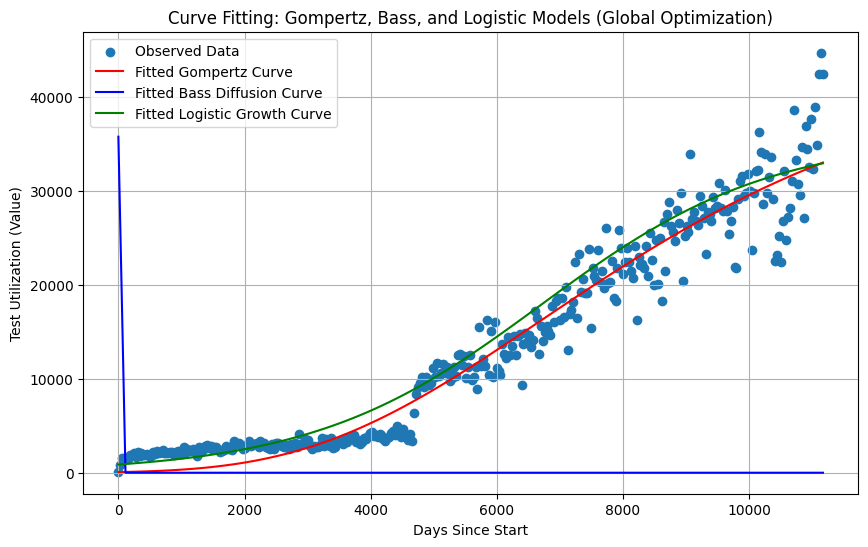

Best Gompertz parameters: L=43946.08, k=0.0003, t0=6696.35
Best Bass Diffusion parameters: p=0.1000, q=0.0411, m=35731.20
Best Logistic Growth parameters: L=35731.20, k=0.0005, t0=6703.80
The test follows a Gompertz growth pattern.
The test follows a Bass diffusion pattern.
The test follows a Logistic growth pattern.


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

# Load the data (using your file path)
#file_path = "/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/Data Files/Processed_MBSGeneticsCount_20240325_175333.feather"
file_path = "/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/Data Files/Processed_MBSGeneticsCount_20240325_175333.feather"
data = pd.read_feather(file_path)

# Ensure the data is sorted by month
data = data.sort_values(by='Month')

# Aggregating by month
monthly_data = data.groupby('Month')['Value'].sum().reset_index()

# Gompertz Model
def gompertz_function(t, L, k, t0):
    return L * np.exp(-np.exp(-k * (t - t0)))

# Bass Diffusion Model
def bass_diffusion(t, p, q, m):
    adoption = (p + q)**2 * np.exp(-(p + q) * t) / (q * np.exp(-p * t) + p)**2
    return m * adoption

# Logistic Growth Model
def logistic_growth(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))

# Prepare the data for curve fitting
x_data = (monthly_data['Month'] - monthly_data['Month'].min()).dt.days  # Days since the first month
y_data = monthly_data['Value'].values

# Define the bounds for the parameters for global optimization
bounds_gompertz = [(max(y_data) * 0.8, max(y_data) * 1.2),  # L bounds
                   (0.0001, 0.01),  # k bounds
                   (np.median(x_data) * 0.8, np.median(x_data) * 1.2)]  # t0 bounds

bounds_bass = [(0.01, 0.1),  # p bounds
               (0.01, 1),    # q bounds
               (max(y_data) * 0.8, max(y_data) * 1.2)]  # m bounds

bounds_logistic = [(max(y_data) * 0.8, max(y_data) * 1.2),  # L bounds
                   (0.0001, 0.01),  # k bounds
                   (np.median(x_data) * 0.8, np.median(x_data) * 1.2)]  # t0 bounds

# Function to calculate sum of squared residuals
def calculate_residuals(model_func, params, x_data, y_data):
    y_pred = model_func(x_data, *params)
    residuals = np.sum((y_pred - y_data) ** 2)
    return residuals

# Global optimization with differential evolution for Gompertz model
result_gompertz = differential_evolution(lambda params: calculate_residuals(gompertz_function, params, x_data, y_data),
                                         bounds_gompertz)

# Global optimization with differential evolution for Bass Diffusion model
result_bass = differential_evolution(lambda params: calculate_residuals(bass_diffusion, params, x_data, y_data),
                                     bounds_bass)

# Global optimization with differential evolution for Logistic Growth model
result_logistic = differential_evolution(lambda params: calculate_residuals(logistic_growth, params, x_data, y_data),
                                         bounds_logistic)

# Extract the best-fitting parameters from the global optimization results
L_g, k_g, t0_g = result_gompertz.x
p_b, q_b, m_b = result_bass.x
L_l, k_l, t0_l = result_logistic.x

# Generate fitted values for the curves
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit_gompertz = gompertz_function(x_fit, L_g, k_g, t0_g)
y_fit_bass = bass_diffusion(x_fit, p_b, q_b, m_b)
y_fit_logistic = logistic_growth(x_fit, L_l, k_l, t0_l)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Observed Data')
plt.plot(x_fit, y_fit_gompertz, color='red', label='Fitted Gompertz Curve')
plt.plot(x_fit, y_fit_bass, color='blue', label='Fitted Bass Diffusion Curve')
plt.plot(x_fit, y_fit_logistic, color='green', label='Fitted Logistic Growth Curve')
plt.title('Curve Fitting: Gompertz, Bass, and Logistic Models (Global Optimization)')
plt.xlabel('Days Since Start')
plt.ylabel('Test Utilization (Value)')
plt.legend()
plt.grid(True)
plt.show()

# Print the fitted parameters for all models
print(f"Best Gompertz parameters: L={L_g:.2f}, k={k_g:.4f}, t0={t0_g:.2f}")
print(f"Best Bass Diffusion parameters: p={p_b:.4f}, q={q_b:.4f}, m={m_b:.2f}")
print(f"Best Logistic Growth parameters: L={L_l:.2f}, k={k_l:.4f}, t0={t0_l:.2f}")

# Check for growth patterns
if k_g > 0:
    print("The test follows a Gompertz growth pattern.")
else:
    print("The test does not follow a Gompertz growth pattern.")

if p_b > 0 and q_b > 0:
    print("The test follows a Bass diffusion pattern.")
else:
    print("The test does not follow a Bass diffusion pattern.")

if k_l > 0:
    print("The test follows a Logistic growth pattern.")
else:
    print("The test does not follow a Logistic growth pattern.")


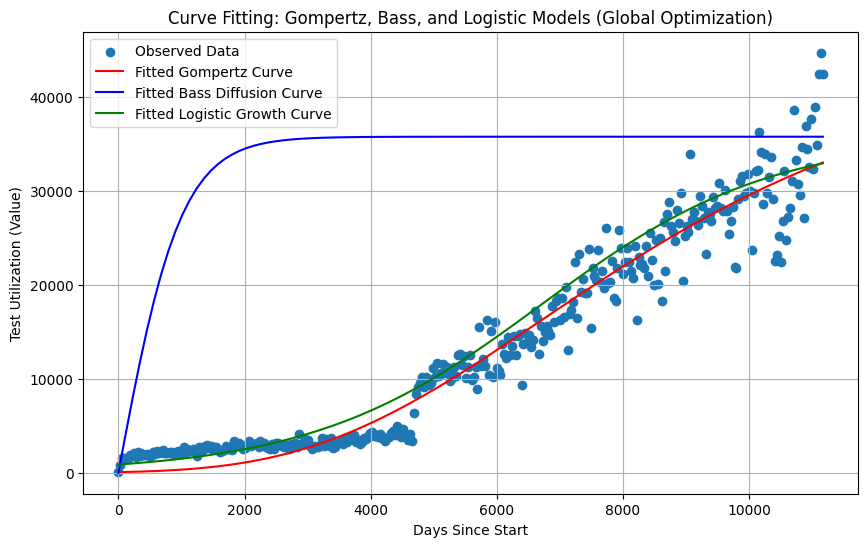

Best Gompertz parameters: L=43990.92, k=0.0003, t0=6701.13
Best Bass Diffusion parameters: p=0.0010, q=0.0010, m=35731.20
Best Logistic Growth parameters: L=35732.26, k=0.0005, t0=6703.78
The test follows a Gompertz growth pattern.
The test follows a Bass diffusion pattern.
The test follows a Logistic growth pattern.


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

# Load the data (using your file path)
#file_path = "/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/Data Files/Processed_MBSGeneticsCount_20240325_175333.feather"
file_path = "/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/Data Files/Processed_MBSGeneticsCount_20240325_175333.feather"
data = pd.read_feather(file_path)

# Ensure the data is sorted by month
data = data.sort_values(by='Month')

# Aggregating by month
monthly_data = data.groupby('Month')['Value'].sum().reset_index()

# Gompertz Model
def gompertz_function(t, L, k, t0):
    return L * np.exp(-np.exp(-k * (t - t0)))

# Updated Bass Diffusion Model (Cumulative Adoption)
def bass_diffusion(t, p, q, m):
    exp_component = np.exp(-(p + q) * t)
    cumulative_adoption = m * (1 - exp_component) / (1 + (q / p) * exp_component)
    return cumulative_adoption

# Logistic Growth Model
def logistic_growth(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))

# Prepare the data for curve fitting
x_data = (monthly_data['Month'] - monthly_data['Month'].min()).dt.days  # Days since the first month
y_data = monthly_data['Value'].values

# Define the bounds for the parameters for global optimization
bounds_gompertz = [(max(y_data) * 0.8, max(y_data) * 1.2),  # L bounds
                   (0.0001, 0.01),  # k bounds
                   (np.median(x_data) * 0.8, np.median(x_data) * 1.2)]  # t0 bounds

bounds_bass = [(0.001, 0.1),  # p bounds (innovation rate)
               (0.001, 1),    # q bounds (imitation rate)
               (max(y_data) * 0.8, max(y_data) * 1.2)]  # m bounds (market potential)

bounds_logistic = [(max(y_data) * 0.8, max(y_data) * 1.2),  # L bounds
                   (0.0001, 0.01),  # k bounds
                   (np.median(x_data) * 0.8, np.median(x_data) * 1.2)]  # t0 bounds

# Function to calculate sum of squared residuals
def calculate_residuals(model_func, params, x_data, y_data):
    y_pred = model_func(x_data, *params)
    residuals = np.sum((y_pred - y_data) ** 2)
    return residuals

# Global optimization with differential evolution for Gompertz model
result_gompertz = differential_evolution(lambda params: calculate_residuals(gompertz_function, params, x_data, y_data),
                                         bounds_gompertz)

# Global optimization with differential evolution for Bass Diffusion model
result_bass = differential_evolution(lambda params: calculate_residuals(bass_diffusion, params, x_data, y_data),
                                     bounds_bass)

# Global optimization with differential evolution for Logistic Growth model
result_logistic = differential_evolution(lambda params: calculate_residuals(logistic_growth, params, x_data, y_data),
                                         bounds_logistic)

# Extract the best-fitting parameters from the global optimization results
L_g, k_g, t0_g = result_gompertz.x
p_b, q_b, m_b = result_bass.x
L_l, k_l, t0_l = result_logistic.x

# Generate fitted values for the curves
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit_gompertz = gompertz_function(x_fit, L_g, k_g, t0_g)
y_fit_bass = bass_diffusion(x_fit, p_b, q_b, m_b)
y_fit_logistic = logistic_growth(x_fit, L_l, k_l, t0_l)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Observed Data')
plt.plot(x_fit, y_fit_gompertz, color='red', label='Fitted Gompertz Curve')
plt.plot(x_fit, y_fit_bass, color='blue', label='Fitted Bass Diffusion Curve')
plt.plot(x_fit, y_fit_logistic, color='green', label='Fitted Logistic Growth Curve')
plt.title('Curve Fitting: Gompertz, Bass, and Logistic Models (Global Optimization)')
plt.xlabel('Days Since Start')
plt.ylabel('Test Utilization (Value)')
plt.legend()
plt.grid(True)
plt.show()

# Print the fitted parameters for all models
print(f"Best Gompertz parameters: L={L_g:.2f}, k={k_g:.4f}, t0={t0_g:.2f}")
print(f"Best Bass Diffusion parameters: p={p_b:.4f}, q={q_b:.4f}, m={m_b:.2f}")
print(f"Best Logistic Growth parameters: L={L_l:.2f}, k={k_l:.4f}, t0={t0_l:.2f}")

# Check for growth patterns
if k_g > 0:
    print("The test follows a Gompertz growth pattern.")
else:
    print("The test does not follow a Gompertz growth pattern.")

if p_b > 0 and q_b > 0:
    print("The test follows a Bass diffusion pattern.")
else:
    print("The test does not follow a Bass diffusion pattern.")

if k_l > 0:
    print("The test follows a Logistic growth pattern.")
else:
    print("The test does not follow a Logistic growth pattern.")


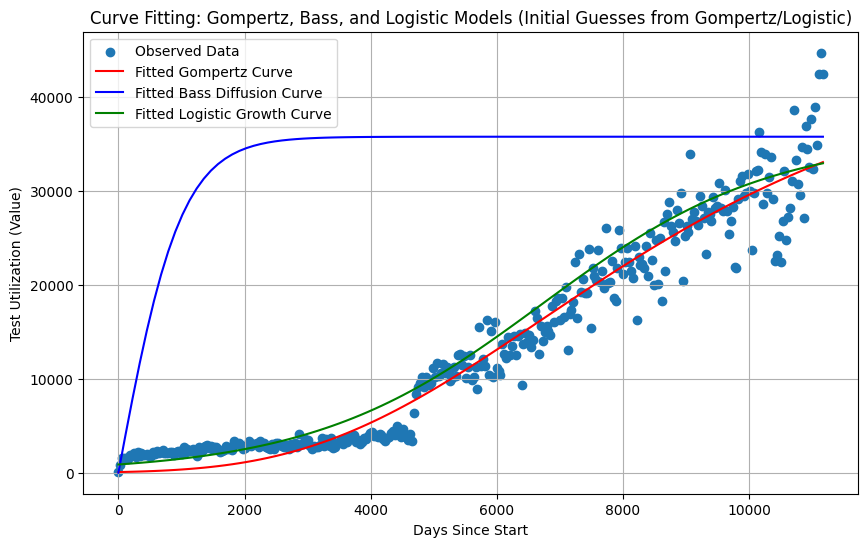

Best Gompertz parameters: L=44117.86, k=0.0003, t0=6703.32
Best Bass Diffusion parameters: p=0.0010, q=0.0010, m=35731.20
Best Logistic Growth parameters: L=35731.20, k=0.0005, t0=6703.80
The test follows a Gompertz growth pattern.
The test follows a Bass diffusion pattern.
The test follows a Logistic growth pattern.


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, differential_evolution

# Load the data (using your file path)
#file_path = "/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/Data Files/Processed_MBSGeneticsCount_20240325_175333.feather"
file_path = "/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/Data Files/Processed_MBSGeneticsCount_20240325_175333.feather"
data = pd.read_feather(file_path)

# Ensure the data is sorted by month
data = data.sort_values(by='Month')

# Aggregating by month
monthly_data = data.groupby('Month')['Value'].sum().reset_index()

# Gompertz Model
def gompertz_function(t, L, k, t0):
    return L * np.exp(-np.exp(-k * (t - t0)))

# Updated Bass Diffusion Model (Cumulative Adoption)
def bass_diffusion(t, p, q, m):
    exp_component = np.exp(-(p + q) * t)
    cumulative_adoption = m * (1 - exp_component) / (1 + (q / p) * exp_component)
    return cumulative_adoption

# Logistic Growth Model
def logistic_growth(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))

# Prepare the data for curve fitting
x_data = (monthly_data['Month'] - monthly_data['Month'].min()).dt.days  # Days since the first month
y_data = monthly_data['Value'].values

# Define the bounds for the parameters for global optimization
bounds_gompertz = [(max(y_data) * 0.8, max(y_data) * 1.2),  # L bounds
                   (0.0001, 0.01),  # k bounds
                   (np.median(x_data) * 0.8, np.median(x_data) * 1.2)]  # t0 bounds

bounds_logistic = [(max(y_data) * 0.8, max(y_data) * 1.2),  # L bounds
                   (0.0001, 0.01),  # k bounds
                   (np.median(x_data) * 0.8, np.median(x_data) * 1.2)]  # t0 bounds

# Function to calculate sum of squared residuals
def calculate_residuals(model_func, params, x_data, y_data):
    y_pred = model_func(x_data, *params)
    residuals = np.sum((y_pred - y_data) ** 2)
    return residuals

# Global optimization with differential evolution for Gompertz model
result_gompertz = differential_evolution(lambda params: calculate_residuals(gompertz_function, params, x_data, y_data),
                                         bounds_gompertz)

# Global optimization with differential evolution for Logistic Growth model
result_logistic = differential_evolution(lambda params: calculate_residuals(logistic_growth, params, x_data, y_data),
                                         bounds_logistic)

# Extract the best-fitting parameters from the global optimization results
L_g, k_g, t0_g = result_gompertz.x
L_l, k_l, t0_l = result_logistic.x

# Use fitted Gompertz/Logistic parameters to derive initial guesses for Bass diffusion
initial_guess_bass = [
    min(k_g, k_l),  # p (innovation rate) can be close to the growth rate
    max(k_g, k_l) / 2,  # q (imitation rate) can be somewhat larger than p
    (L_g + L_l) / 2  # m (market potential) can be an average of the asymptotes
]

# Split bounds for Bass diffusion model into lower and upper bounds
lower_bounds_bass = [0.001, 0.001, max(y_data) * 0.8]  # Lower bounds for p, q, and m
upper_bounds_bass = [0.1, 1, max(y_data) * 1.2]  # Upper bounds for p, q, and m

# Ensure initial guesses are within bounds
initial_guess_bass = np.clip(initial_guess_bass, lower_bounds_bass, upper_bounds_bass)

# Fit Bass diffusion model using initial guesses from Gompertz and Logistic models
params_bass, _ = curve_fit(bass_diffusion, x_data, y_data, p0=initial_guess_bass, bounds=(lower_bounds_bass, upper_bounds_bass), maxfev=2000)

# Extract the best-fitting parameters for the Bass model
p_b, q_b, m_b = params_bass

# Generate fitted values for the curves
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit_gompertz = gompertz_function(x_fit, L_g, k_g, t0_g)
y_fit_bass = bass_diffusion(x_fit, p_b, q_b, m_b)
y_fit_logistic = logistic_growth(x_fit, L_l, k_l, t0_l)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Observed Data')
plt.plot(x_fit, y_fit_gompertz, color='red', label='Fitted Gompertz Curve')
plt.plot(x_fit, y_fit_bass, color='blue', label='Fitted Bass Diffusion Curve')
plt.plot(x_fit, y_fit_logistic, color='green', label='Fitted Logistic Growth Curve')
plt.title('Curve Fitting: Gompertz, Bass, and Logistic Models (Initial Guesses from Gompertz/Logistic)')
plt.xlabel('Days Since Start')
plt.ylabel('Test Utilization (Value)')
plt.legend()
plt.grid(True)
plt.show()

# Print the fitted parameters for all models
print(f"Best Gompertz parameters: L={L_g:.2f}, k={k_g:.4f}, t0={t0_g:.2f}")
print(f"Best Bass Diffusion parameters: p={p_b:.4f}, q={q_b:.4f}, m={m_b:.2f}")
print(f"Best Logistic Growth parameters: L={L_l:.2f}, k={k_l:.4f}, t0={t0_l:.2f}")

# Check for growth patterns
if k_g > 0:
    print("The test follows a Gompertz growth pattern.")
else:
    print("The test does not follow a Gompertz growth pattern.")

if p_b > 0 and q_b > 0:
    print("The test follows a Bass diffusion pattern.")
else:
    print("The test does not follow a Bass diffusion pattern.")

if k_l > 0:
    print("The test follows a Logistic growth pattern.")
else:
    print("The test does not follow a Logistic growth pattern.")


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, differential_evolution

# Load the data (using your file path)
#file_path = "/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/Data Files/Processed_MBSGeneticsCount_20240325_175333.feather"
file_path = "/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/Data Files/Processed_MBSGeneticsCount_20240325_175333.feather"
data = pd.read_feather(file_path)

# Ensure the data is sorted by month
data = data.sort_values(by='Month')

# Gompertz Model
def gompertz_function(t, L, k, t0):
    return L * np.exp(-np.exp(-k * (t - t0)))

# Bass Diffusion Model (Cumulative Adoption)
def bass_diffusion(t, p, q, m):
    exp_component = np.exp(-(p + q) * t)
    cumulative_adoption = m * (1 - exp_component) / (1 + (q / p) * exp_component)
    return cumulative_adoption

# Logistic Growth Model
def logistic_growth(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))

# Function to calculate sum of squared residuals
def calculate_residuals(model_func, params, x_data, y_data):
    y_pred = model_func(x_data, *params)
    residuals = np.sum((y_pred - y_data) ** 2)
    return residuals

# Prepare the results DataFrame
results = []

# Loop through each unique 'Item' category
for item in data['Item'].unique():
    print(f"Fitting for Item: {item}")
    
    # Filter data for the current item
    item_data = data[data['Item'] == item]
    
    # Prepare the data for curve fitting
    x_data = (item_data['Month'] - item_data['Month'].min()).dt.days  # Days since the first month
    y_data = item_data['Value'].values
    
    # Set default fitting results to None or False
    fit_result = {
        'Item': item,
        'Gompertz_Fit': False,
        'Bass_Fit': False,
        'Logistic_Fit': False,
        'L_gompertz': None, 'k_gompertz': None, 't0_gompertz': None,
        'p_bass': None, 'q_bass': None, 'm_bass': None,
        'L_logistic': None, 'k_logistic': None, 't0_logistic': None
    }

    # Set bounds for each model
    bounds_gompertz = [(max(y_data) * 0.8, max(y_data) * 1.2),  # L bounds
                       (0.0001, 0.01),  # k bounds
                       (np.median(x_data) * 0.8, np.median(x_data) * 1.2)]  # t0 bounds

    bounds_logistic = [(max(y_data) * 0.8, max(y_data) * 1.2),  # L bounds
                       (0.0001, 0.01),  # k bounds
                       (np.median(x_data) * 0.8, np.median(x_data) * 1.2)]  # t0 bounds
    
    # Global optimization with differential evolution for Gompertz model
    try:
        result_gompertz = differential_evolution(lambda params: calculate_residuals(gompertz_function, params, x_data, y_data),
                                                 bounds_gompertz)
        L_g, k_g, t0_g = result_gompertz.x
        fit_result.update({
            'Gompertz_Fit': True,
            'L_gompertz': L_g,
            'k_gompertz': k_g,
            't0_gompertz': t0_g
        })
    except:
        print(f"Failed to fit Gompertz model for Item: {item}")

    # Global optimization with differential evolution for Logistic model
    try:
        result_logistic = differential_evolution(lambda params: calculate_residuals(logistic_growth, params, x_data, y_data),
                                                 bounds_logistic)
        L_l, k_l, t0_l = result_logistic.x
        fit_result.update({
            'Logistic_Fit': True,
            'L_logistic': L_l,
            'k_logistic': k_l,
            't0_logistic': t0_l
        })
    except:
        print(f"Failed to fit Logistic model for Item: {item}")
    
    # Use fitted Gompertz/Logistic parameters to derive initial guesses for Bass diffusion
    initial_guess_bass = [
        min(k_g, k_l),  # p (innovation rate) can be close to the growth rate
        max(k_g, k_l) / 2,  # q (imitation rate) can be somewhat larger than p
        (L_g + L_l) / 2  # m (market potential) can be an average of the asymptotes
    ]

    # Split bounds for Bass diffusion model into lower and upper bounds
    lower_bounds_bass = [0.001, 0.001, max(y_data) * 0.8]  # Lower bounds for p, q, and m
    upper_bounds_bass = [0.1, 1, max(y_data) * 1.2]  # Upper bounds for p, q, and m

    # Ensure initial guesses are within bounds
    initial_guess_bass = np.clip(initial_guess_bass, lower_bounds_bass, upper_bounds_bass)

    # Fit Bass diffusion model using initial guesses from Gompertz and Logistic models
    try:
        params_bass, _ = curve_fit(bass_diffusion, x_data, y_data, p0=initial_guess_bass, bounds=(lower_bounds_bass, upper_bounds_bass), maxfev=2000)
        p_b, q_b, m_b = params_bass
        fit_result.update({
            'Bass_Fit': True,
            'p_bass': p_b,
            'q_bass': q_b,
            'm_bass': m_b
        })
    except:
        print(f"Failed to fit Bass diffusion model for Item: {item}")
    
    # Append the result for the current item to the list
    results.append(fit_result)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Show the results
print(results_df)


Fitting for Item: 73289
Fitting for Item: 73287
Fitting for Item: 73300
Fitting for Item: 73305
Fitting for Item: 73311
Fitting for Item: 73317
Fitting for Item: 73320
Fitting for Item: 73308
Fitting for Item: 73314
Fitting for Item: 73321
Fitting for Item: 73312
Fitting for Item: 73309
Fitting for Item: 73318
Fitting for Item: 73315
Fitting for Item: 73323
Fitting for Item: 73324
Fitting for Item: 73293
Fitting for Item: 73290
Fitting for Item: 73291
Fitting for Item: 73292
Fitting for Item: 73294
Fitting for Item: 73327
Fitting for Item: 73325
Fitting for Item: 73326
Fitting for Item: 73332
Fitting for Item: 73333
Fitting for Item: 73334
Fitting for Item: 73336
Fitting for Item: 73337
Fitting for Item: 73338
Fitting for Item: 73335
Fitting for Item: 73339
Fitting for Item: 73341
Fitting for Item: 73342
Fitting for Item: 73340
Fitting for Item: 73295
Fitting for Item: 73343
Fitting for Item: 73297
Fitting for Item: 73296
Fitting for Item: 73349
Fitting for Item: 73345
Fitting for Item

In [24]:
# Save the results to a CSV file
results_df.to_csv('model_fit_results.csv', index=False)


/var/folders/m9/_g3wndrn04d80ys2382r700r0000gn/T/ipykernel_4025/80885842.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(['State', 'Month'])['Value'].sum().reset_index()
/Users/doughnut/miniconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/m9/_g3wndrn04d80ys2382r700r0000gn/T/ipykernel_4025/80885842.py:41: OptimizeWarning: Covariance of the parameters could not be estimated
  params_bass, _ = curve_fit(bass_diffusion, x_data, y_data, p0=initial_guess_bass, maxfev=2000)
/var/folders/m9/_g3wndrn04d80ys2382r700r0000gn/T/ipykernel_4025/80885842.py:38: OptimizeWarning: Covariance of the parameters could not be estimated
  params_gompertz, _ = curv

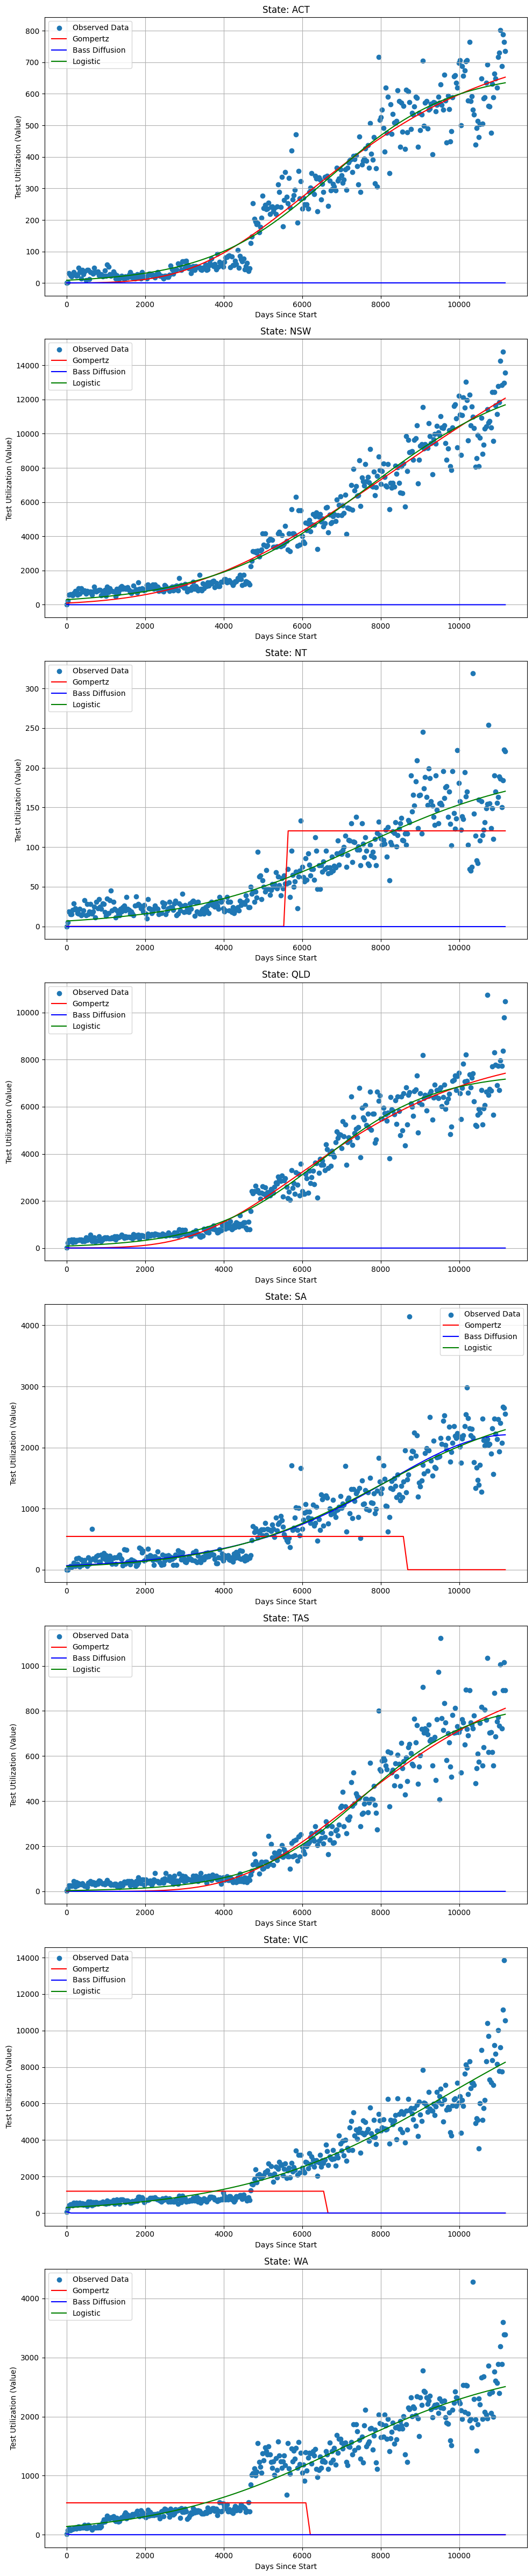

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the data (using your file path)
#file_path = "/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/Data Files/Processed_MBSGeneticsCount_20240325_175333.feather"
file_path = "/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/Data Files/Processed_MBSGeneticsCount_20240325_175333.feather"
data = pd.read_feather(file_path)

# Ensure the data is sorted by month
data = data.sort_values(by='Month')

# Aggregating by month and state
grouped_data = data.groupby(['State', 'Month'])['Value'].sum().reset_index()

# Gompertz Model
def gompertz_function(t, L, k, t0):
    return L * np.exp(-np.exp(-k * (t - t0)))

# Bass Diffusion Model
def bass_diffusion(t, p, q, m):
    adoption = (p + q)**2 * np.exp(-(p + q) * t) / (q * np.exp(-p * t) + p)**2
    return m * adoption

# Logistic Growth Model
def logistic_growth(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))

# Define a function to fit the models and return parameters and fitted values
def fit_models(x_data, y_data):
    # Initial guesses for all models
    initial_guess_gompertz = [max(y_data), 0.1, np.median(x_data)]
    initial_guess_bass = [0.03, 0.38, max(y_data)]  # p, q, m
    initial_guess_logistic = [max(y_data), 0.1, np.median(x_data)]

    # Fit the Gompertz model
    params_gompertz, _ = curve_fit(gompertz_function, x_data, y_data, p0=initial_guess_gompertz, maxfev=2000)

    # Fit the Bass diffusion model
    params_bass, _ = curve_fit(bass_diffusion, x_data, y_data, p0=initial_guess_bass, maxfev=2000)

    # Fit the Logistic growth model
    params_logistic, _ = curve_fit(logistic_growth, x_data, y_data, p0=initial_guess_logistic, maxfev=2000)

    # Generate fitted values for the curves
    x_fit = np.linspace(min(x_data), max(x_data), 100)
    y_fit_gompertz = gompertz_function(x_fit, *params_gompertz)
    y_fit_bass = bass_diffusion(x_fit, *params_bass)
    y_fit_logistic = logistic_growth(x_fit, *params_logistic)

    return params_gompertz, params_bass, params_logistic, x_fit, y_fit_gompertz, y_fit_bass, y_fit_logistic

# Get unique states
states = grouped_data['State'].unique()

# Prepare subplots for visualization
fig, axs = plt.subplots(len(states), 1, figsize=(10, 6 * len(states)))

# Ensure axs is always iterable
if len(states) == 1:
    axs = [axs]

# Loop through each state and fit the models
for i, state in enumerate(states):
    # Filter data for the current state
    state_data = grouped_data[grouped_data['State'] == state]

    # Prepare the data for curve fitting
    x_data = (state_data['Month'] - state_data['Month'].min()).dt.days  # Days since the first month
    y_data = state_data['Value'].values

    # Fit models and get fitted values
    params_gompertz, params_bass, params_logistic, x_fit, y_fit_gompertz, y_fit_bass, y_fit_logistic = fit_models(x_data, y_data)

    # Plot the results for the current state
    axs[i].scatter(x_data, y_data, label='Observed Data')
    axs[i].plot(x_fit, y_fit_gompertz, color='red', label='Gompertz')
    axs[i].plot(x_fit, y_fit_bass, color='blue', label='Bass Diffusion')
    axs[i].plot(x_fit, y_fit_logistic, color='green', label='Logistic')
    axs[i].set_title(f'State: {state}')
    axs[i].set_xlabel('Days Since Start')
    axs[i].set_ylabel('Test Utilization (Value)')
    axs[i].legend()
    axs[i].grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()
